

```
# This is formatted as code
```

### INSURANCE CLAIM PROJECT

### Background:
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.
As a Data Scientist in the Plateau Insurance company. The company wants to have a detailed understanding of the customer base for one of its Insurance Policy 'MediClaim'. The idea is to generate insights about the customers and answer a few key questions, by using the past dataset. The dataset 'pla_Insurance' contains customers' details like age, sex, charges, etc.

### Objective:
Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing analysis in Python.
You are expected to do the following:
>  Explore the dataset and extract insights using Exploratory Data Analysis.
- Prove(or disprove) that the medical claims made by the people who smoke are greater than those who don't?
- Prove (or disprove) with that the BMI of females is different from that of males.
- Does the smoking habit of customers depend on their region?
- Is the mean BMI of women with no children, one child, and two children the same? 



#### Data Dictionary –
- Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex - This is the policy holder's gender, either male or female.
- BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
- Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
- Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges - Individual medical costs billed to health insurance


### importing necesary libraries

In [1]:
#import libraries 
import pandas as pd
import numpy as np


In [2]:
# data importing and reading in of Data sets
df = pd.read_csv("plateau_Insurance.csv")



In [3]:
#assess the dataset's description
df.describe() #this gives the descriptive statistics of the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.682687,1.094918,13270.422265
std,14.049960,6.145674,1.205493,12110.011237
min,18.000000,14.000000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info() #this tells the type of data availiable it basically gives a general overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head() #this gives an overview of the dataframe by showing the first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#assess the dataset for data duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:
df.duplicated().sum() #this is the total sum of duplicated values

1

In [8]:
#we have 1 duplicate value and i will treat it by.
df.drop_duplicates(subset= None, inplace= True)
df
#the subset takes a column or list of columns, its default value is none, inplace removes the row with duplicate value from
#the original data when true, observe the number of rows have reduced by 1.

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,52,female,46.750,5,no,southeast,12592.53450
1335,54,female,47.410,0,yes,southeast,63770.42801
1336,37,female,47.600,2,yes,southwest,46113.51100


In [9]:
df.describe() #this describes the data after duplicate have been done to get the new result for the descriptive statistics

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.682756,1.095737,13279.121487
std,14.044333,6.147973,1.205571,12110.359656
min,18.000000,14.000000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#assess the dataset for missing data.
df.isnull().sum() #there are no missing value.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### EXPLORATTORY DATA ANALYSIS

### Univariate Analysis

In [11]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm 
import scipy.stats as stats


<AxesSubplot:>

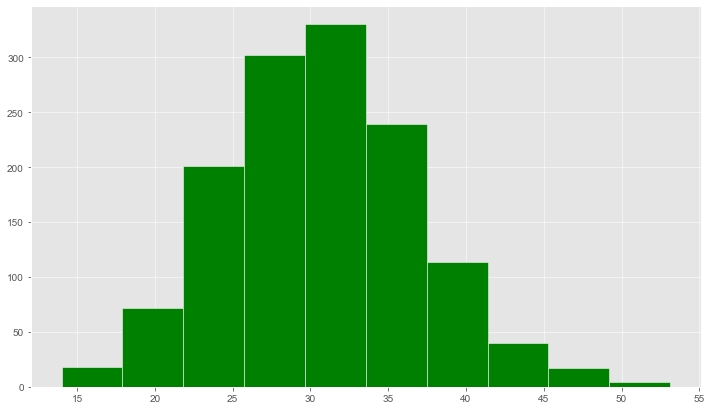

In [45]:
#univariate analysis for the body mass index feature
plt.style.use('ggplot')
df["bmi"].hist(color= "green",edgecolor= "white",figsize=(12,7)) 
#this shows a normal distribution of BMI in the data, since bmi is a continous variable histogram is best to represent it.

<AxesSubplot:xlabel='bmi'>

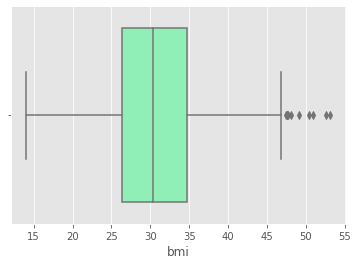

In [13]:
sns.boxplot(x="bmi",data=df,palette='rainbow') #Q1= 26.31,median = 30.40, Q3= 34.70,outliers=7, mean bmi= 30.64
#this points can be seen in the box plot, and the exact values was gotten from the describe method above.

<AxesSubplot:xlabel='charges', ylabel='Count'>

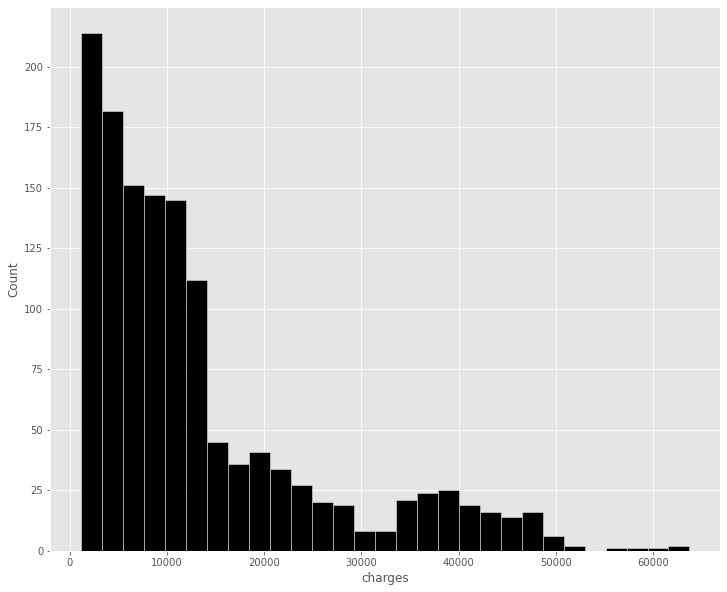

In [14]:
#univariate analysis for the charges feature
plt.figure(figsize=(12,10))
sns.histplot(df["charges"],color ="black",alpha= 1)
#charges is positively skewed

<AxesSubplot:xlabel='charges'>

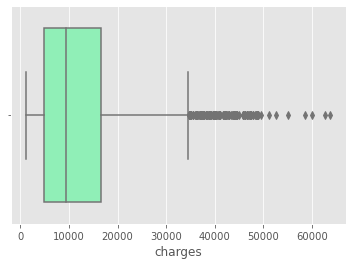

In [15]:
#boxplot for charges,showing the positions of the descriptive datas.
sns.boxplot(x="charges",data=df,palette='rainbow') 
#Q1= 4740.28, Q2= 16639.91, mean= 13270.42.
#charges has lots of outliers,the median is less than the mean as a result of the skewedness.

<AxesSubplot:>

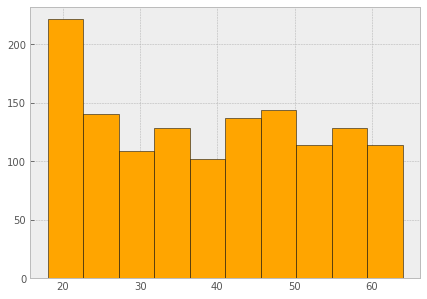

In [16]:
#univariate analysis for the age feature
plt.style.use('bmh')
df["age"].hist(color= "orange",edgecolor= "black",figsize=(7,5))
#this plot shows a normal distribution.


<AxesSubplot:xlabel='age'>

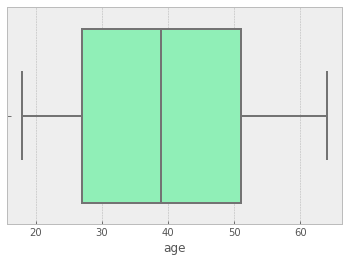

In [17]:
#boxplot for age
sns.boxplot(x="age",data=df,palette='rainbow')
#this boxplot further proves that the above histogram for age is a normal distribution due to the equal distance between
#Q3 and Q1, Q1 = 27
#Q3= 51. the minimum age is 18, the maximum age is 64,mean = 39.2 while the median is 39, there is no outlier

<AxesSubplot:xlabel='smoker', ylabel='count'>

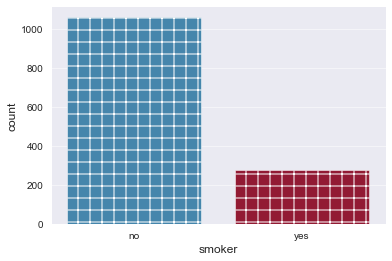

In [18]:
#univariate analysis of the smoker feature
sns.set_style('darkgrid')
sns.countplot(x='smoker',data=df, hatch="+")
#this graph shows the number of non-smokers are higher with values above 1000, while the smokers have counts above 200.
#i used a count plot because the variable are categorical


#### observations
- highlight observations from the univariate analysis

1. The univariate analysis for BMI shows a normal distribution of bmi in the data, and by implication this means the mean,        median and mode of the data are equal, this can be confirmed in the describe method above.

2. The univariate analysis of the charges feature is positively skewed, this means the outliers of the distribution are further    out towards the right and closer to the mean on the left, by implication this means that the charges paid by most people      are alot higher than the average. the mean is greater than the median.

3. The univariate analysis of the age feature shows a normal distribution, this means the mean mode and meian are equal.

4. Univariate analysis of the non smoker feature shows they are more non-smokers than smokers from the data given.

5. The univariate analysis for sex shows a nearly equal number of both genders, however the number of male is slighlty higher      than that of females.

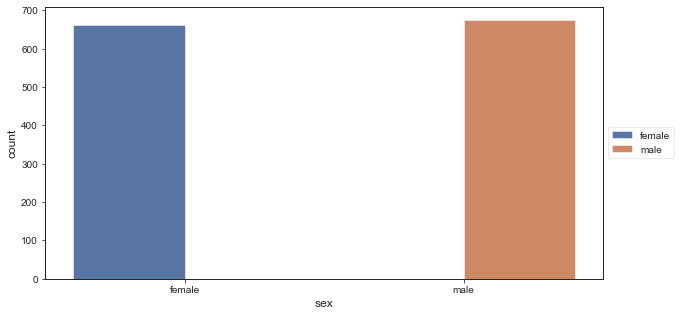

In [19]:
#graphical visualiation of the sex feature
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.countplot(x='sex',data=df,palette='deep',alpha=1, hue="sex")
plt.legend(loc="center left", bbox_to_anchor = (1.0,0.5))
#this plt.legend helps put the legend feature outside the graph for better view
#there are more male than female in this study,i used a count plot because the variables are categorical.

In [20]:
# Overview(Survived vs non survied)

<AxesSubplot:>

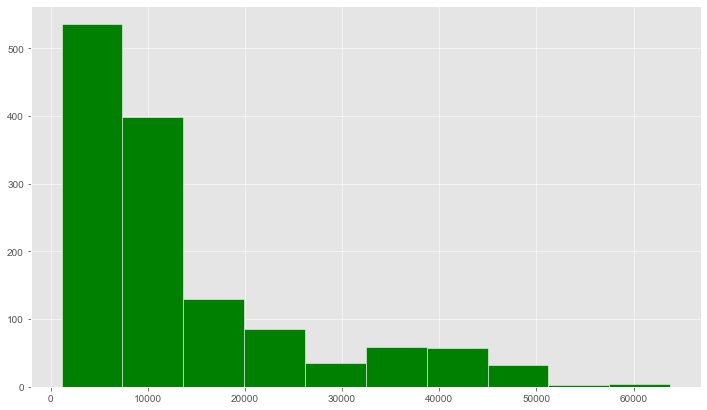

In [21]:
#graphical visualiation of the target label(charges feature)
plt.style.use('ggplot')
df["charges"].hist(color= "green",edgecolor= "white",figsize=(12,7))


### Bivariate Analysis

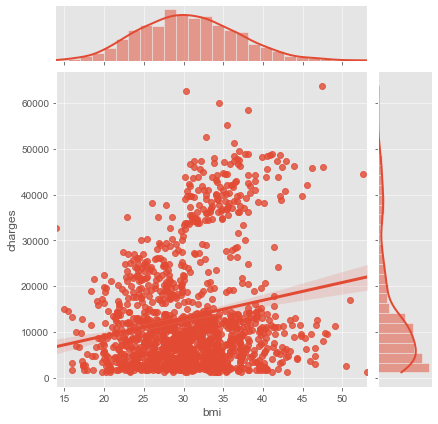

In [22]:
#jointplot exploring the relationship between the bmi vs charges features
sns.jointplot(x='bmi',y='charges',data=df,kind='reg')
#this shows a weak positive correlation between the BMI and CHARGES
#there is a high concentration of charges between bmi 25-35, and most charges are less than 10,000


<AxesSubplot:xlabel='sex', ylabel='bmi'>

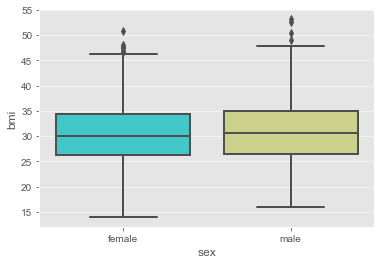

In [23]:
#exploring the distributions and the relationships between the bmi vs the sex/gender feature 
sns.boxplot(x="sex",y ="bmi",data=df,palette='rainbow')
#the distribution of bmi and sex is a normal distribution
#minimum bmi for female is 14.5,maximum is 47, median = 30.2, with lots of outliers
#minimum bmi for male is 17, maximum is 49,median=32, with lots of outliers



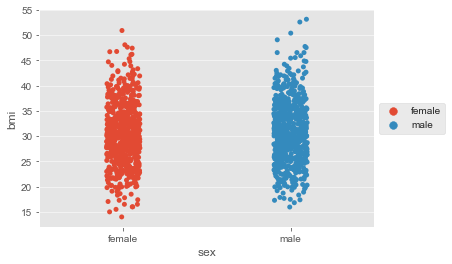

In [24]:
# for the relationship between sex and bmi
sns.stripplot(x="sex", y="bmi", data=df,jitter=True, hue="sex")
plt.legend(loc="center left", bbox_to_anchor = (1.0,0.5))
#bmi for both sex are more between 24 - 40


<function matplotlib.pyplot.show(close=None, block=None)>

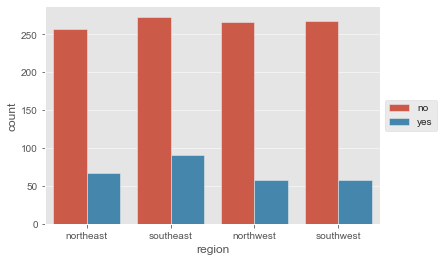

In [25]:
#bivariate analysis of the region vs smoker features
sns.countplot(x= "region",hue ="smoker", data = df)
plt.legend(loc="center left", bbox_to_anchor = (1.0,0.5)) #placing the legend outside
plt.show
#southeast have the highest non smokers and also highest smokers

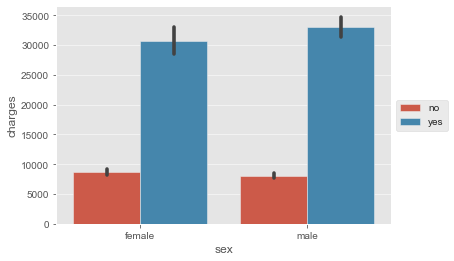

In [26]:
#exploring the relationship between the sex vs smoker vs charges features
sns.barplot(x= "sex",y ="charges", data = df, hue = "smoker")
plt.legend(loc="center left", bbox_to_anchor = (1.0,0.5))
#people who smoke pay more charges than those who do not smoke, male pay highest


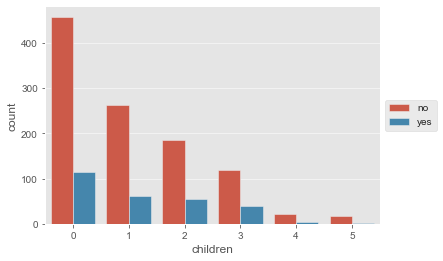

In [27]:
#exploring the relationship between the number of children feature and the smoker feature
sns.countplot(x= "children",hue ="smoker", data = df)
plt.legend(loc="center left", bbox_to_anchor = (1.0,0.5))
#people with no children smoke the most with count above 100,
#comparing non smokers, people with no children also do not smoke the most with count close to 500
#smoking decreases with increase in the number of children


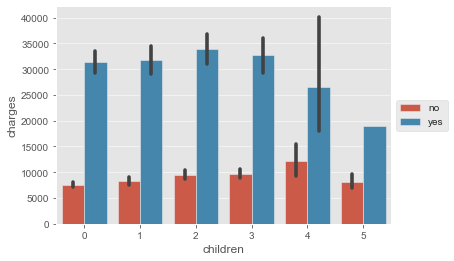

In [28]:
#bivariate analysis of the number of children feature Vs the medical claim charges feature Vs the smoker feature
sns.barplot(x= "children",y ="charges", data = df, hue = "smoker")
plt.legend(loc="center left", bbox_to_anchor = (1.0,0.5)) 
#people with 2 children who smoke pay the highest charges, while non smokers with 4 children pay the highest charge.


#### observation
- state down your observtaions from the bivariate analysis

1. For jointplot between bmi and charges; there is a weak positive correlation between bmi and charges, this means as bmi         increases the charges also increases weakly.
  The charges is postively skewed by implication the mean is greater than the median while the bmi has a normal distribution this   means the mean, median and mode are equal.
  
2. The distribution and relationship between bmi and sex; minimum bmi for female is 14.5,maximum is 47, median = 32, with          lots of outliers minimum bmi for male is 17, maximum is 49,median=32, since it follows a normal distribution the mean bmi    for both sex is = 32. with lots of outliers.For the relationship in the stripplot the bmi for both sex are more between 24-    40

3. For bivariate analysis of the region vs smoker features, southeast has the highest number of smokers and non smokers,          smoking does not depend on region.

4. For the relationship between the sex vs smoker vs charges features, people who smoke pay more charges than those who do not    smoke, male pay highest.

5. for relationship between the number of children feature and the smoker feature, people with no children smoke the most with     count above 100,comparing non smokers people with no children also smoke the most with count close to 500, smoking            decreases with increase in the number of children.

6. for number of children feature Vs the medical claim charges feature Vs the smoker feature, people with 2 children who smoke    pay the highest charges, while non smokers with 4 children pay the highest charge.


### Multivariate Analaysis

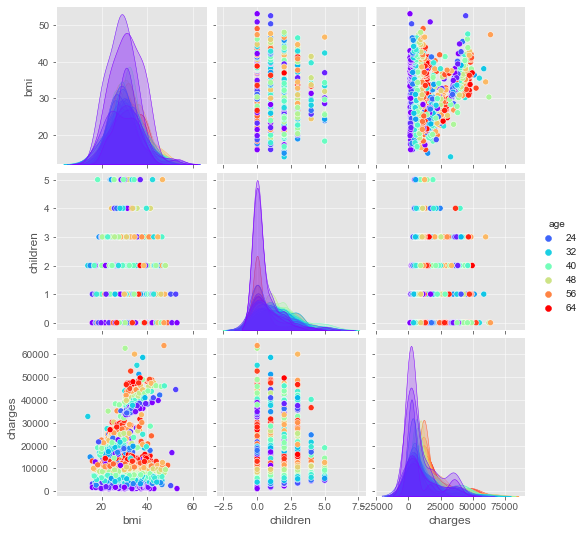

In [29]:
#use a pairplot to explore the relationship between the nummerical features in the dataset
sns.pairplot(data = df,palette="rainbow", hue = "age") 
#pair plot automatically selects the nummerical columns in the data frame.

In [30]:
## heatmeap to see the correlation between features. 
df.corr() #the table below shows the matrix form of the correlation of the result

,age,bmi,children,charges
age,1.000000,0.105911,0.041536,0.298308
bmi,0.105911,1.000000,0.007859,0.197900
children,0.041536,0.007859,1.000000,0.067389
charges,0.298308,0.197900,0.067389,1.000000


<AxesSubplot:>

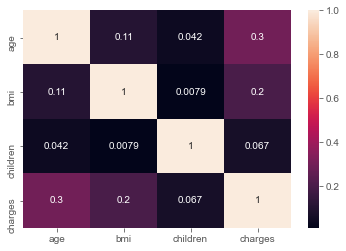

In [31]:
sns.heatmap(df.corr(),annot=True)

**observations**
- state down your observations from the multivariate analysis

  From the result i observed a weak positive correlation between the variables, the denser the colour and the closer the        correlation co-effient is to 0 the weaker the correlation
  the closer the correlation co-efficient is to 1 the stronger the correlation and the less dense the colour is.
 a perfect positive correlation can also be seen between same variables for example age vs age, as the correlation co-efficient   is equal to 1.
 
 from the pairgrid the children vs children variables is positively skewed, this means that they are more family with children  that are above the average number or mean number of children from the data.


#####objective answers below

In [32]:
#OBJECTIVE 2 STATISTICAL ANALYSIS
#i will treat medical claim as equivalent to charges since no column carries medical claim, because the higher the medical
#claim the higher the charges.
df.groupby(["smoker"]).mean()
#the table below proves that people who smoker have higher medical claims than those who do not smoke.


,age,bmi,children,charges
smoker,,,,
no,39.404516,30.659591,1.091251,8440.660307
yes,38.514599,30.772628,1.113139,32050.231832


<AxesSubplot:xlabel='smoker', ylabel='charges'>

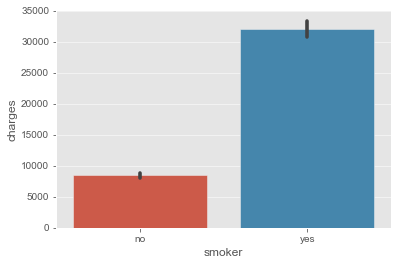

In [33]:
#VISUAL REPRESENTATION OF OBJECTIVE 2
sns.barplot(data=df, x= df["smoker"],y= df["charges"])
#the chart below futher proves that smokers have more medical claims than non smoke.

In [34]:
#Hypothesis testing for objective 2.
#Xs= mean of smokers
#Xns= mean of non smokers
#null hypothesis Ho = the mean charge of smokers and non smokers are equal Xs=Xns
#alternative hypothesis Ha =the mean charge of smokers and non smokers are not equal Xs!=Xns
#i will be using a t-test because t test be best used when comparing a categorical data with a quantitative data.
#alpha level which is my level of significance will be set at 0.05, while my confidence interval will be 95%.
x=np.array(df[df.smoker=="yes"].charges)#select only smokers
y=np.array(df[df.smoker=="no"].charges)#select only non smokers
t,p_value= stats.ttest_ind(x,y ,axis=0)
if p_value< 0.05:
    print("Charges of smoker and non smokers are not the same, reject null hypothesis")
else:
    print ("Charges of smokers and non smokers are the same, accept null hypothesis")
#since its a two tailed hypothesis it only tell us there is a difference in charge without the direction of difference, from
#the previous analysis we ca tell that smokers pay higher.


Charges of smoker and non smokers are not the same, reject null hypothesis


In [35]:
#objective 3 statistical analysis
df.groupby(["sex","children"]).mean()
#the result below shows that the mean bmi of male and female are APPROXIMATELY equal they are the same


age        bmi       charges
sex    children                                    
female 0         38.346021  30.485502  11905.714276
       1         39.506329  30.047500  12161.360414
       2         40.512605  30.572437  13941.317326
       3         42.181818  30.436429  13865.605066
       4         42.000000  31.943182  13937.674562
       5         37.000000  30.620625   9854.006419
male   0         38.612676  30.742254  12872.109178
       1         39.403614  31.166145  13273.522458
       2         38.396694  31.300992  16187.095325
       3         40.975000  30.922937  16789.167419
       4         36.642857  30.957500  13782.284829
       5         34.500000  28.792500   7931.658310

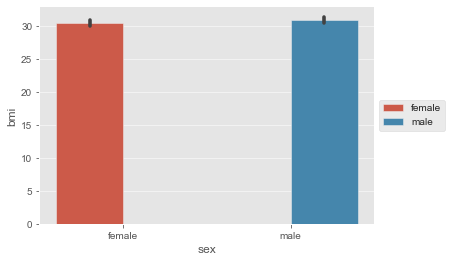

In [36]:
#visual representation of the above
sns.barplot(x= "sex",y ="bmi", data = df, hue = "sex")
plt.legend(loc="center left", bbox_to_anchor = (1.0,0.5)) 
#MALE AND FEMALE BMI ARE APPROXIMATELY EQUAL

In [37]:
#HYPOTHESIS TESTING FOR OBJECTIVE 3
#H0 = BMI of males and females are equal
#Ha= BMI of males and females are not equal
x = np.array(df[df.sex=="male"].bmi) #this select only the bmi of male
y= np.array(df[df.sex=="female"].bmi)#this select only bmi of female
t,p_value = stats.ttest_ind(x,y, axis= 0)
if p_value<0.05:
    print("BMI of male and female are NOT EQUAL")
else:
    print("BMI of male and female are EQUAL")
#we will accept the null hypothesis which means BMI of male and female are equal.
#this confirms the results above

BMI of male and female are EQUAL


In [38]:
#OBJECTIVE 4 statistical analysis
pd.crosstab(index= df.region, columns= df.smoker)
#this result proves that smoking does not depend on region because southeast has the highest smokers and still has the highest
#number of none smokers.

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


<AxesSubplot:xlabel='smoker', ylabel='region'>

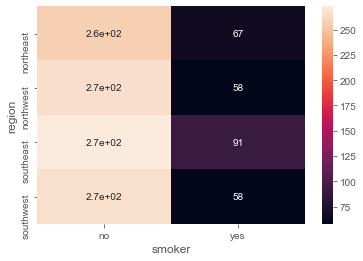

In [39]:
#visual representation
sns.heatmap(pd.crosstab(index= df.region, columns= df.smoker), annot =True)
#a visual representation proving that southeast has the highest smoker and non smoker by the faint colours.
#this proves smoking does not depend on region

In [40]:
#HYPOTHESES FOR OBJECTIVE 4
#Ho(null hypothesis)= Smoking does not depend on region
#Ha(alternative hypothesis) = Smoking depends on region
#a chi-square most apporiate for this analysis because the variables involved are categorical
crosstab= pd.crosstab(df["smoker"],df["region"])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
if p_value<0.05:
    print("Smoking depend on region")
else:
    print("Smoking does not depends on region")
#we will accept the null hypothesis, which state smoking does not depend on region, because the p_value is higher than 0.05




Smoking does not depends on region


In [41]:
#OBJECTIVE 5 STATISTICAL ANALYSIS.
df.groupby(["sex","children"]).mean()
#the mean BMI of women with 0,1,and 2 children are the same. where mean bmi= 30 for all female with 0,1,and 2 children

age        bmi       charges
sex    children                                    
female 0         38.346021  30.485502  11905.714276
       1         39.506329  30.047500  12161.360414
       2         40.512605  30.572437  13941.317326
       3         42.181818  30.436429  13865.605066
       4         42.000000  31.943182  13937.674562
       5         37.000000  30.620625   9854.006419
male   0         38.612676  30.742254  12872.109178
       1         39.403614  31.166145  13273.522458
       2         38.396694  31.300992  16187.095325
       3         40.975000  30.922937  16789.167419
       4         36.642857  30.957500  13782.284829
       5         34.500000  28.792500   7931.658310

In [42]:
#visual representation step1
#we will have to seperate the male from the female, then use conditional statement to select the number of children.
plateau=df[(df["sex"]=="female") & (df["children"]<3)]
plateau

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.00,1,no,northeast,3167.45585
5,26,female,15.50,2,yes,northeast,14455.64405
6,37,female,16.50,2,no,northeast,6877.98010
7,28,female,17.29,0,no,northeast,3732.62510
9,21,female,17.40,1,no,southwest,2585.26900
...,...,...,...,...,...,...,...
1331,43,female,46.20,0,yes,southeast,45863.20500
1332,54,female,46.70,2,no,southwest,11538.42100
1335,54,female,47.41,0,yes,southeast,63770.42801
1336,37,female,47.60,2,yes,southwest,46113.51100


<AxesSubplot:xlabel='children', ylabel='bmi'>

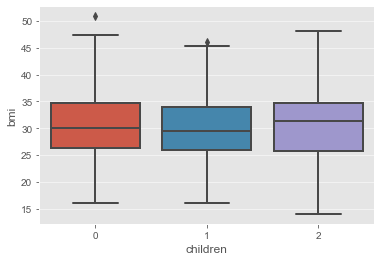

In [43]:
# step2 using a boxplot we can see the visual representation, which further confirms that the bmi are equal for these women.
sns.boxplot(data= plateau,x=plateau["children"],y=plateau["bmi"])

In [44]:
#Hypothesis for objective 5
#Ho= women with 0,1,2 children have equal BMI
#Ha= women with 0,1,2 children do not have equal BMI
#The f test will be used here because it is use to test for equality between 2 population variances 
x= df[(df["sex"]=="female")]
none=x[x.children==0]["bmi"]
one=x[x.children==1]["bmi"]
two=x[x.children==2]["bmi"]
f_stat,p_value=stats.f_oneway(none,one,two)
if p_value<0.05:
    print('Women with 0,1,2 children do not have equal BMI')
else:
    print('Women with 0,1,2 children have equal BMI')
#from this hypothesis testing we can see that women with 0,1,2 children has equal BMI

Women with 0,1,2 children have equal BMI
